In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
#Data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255
# we much scale X values to 0-1 range
# we do not need to scale y values because they are already in 0-9 range

class_names = ["T-shirt/top", "Trouser", "Pullover", 
               "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]

In [6]:
# standardize the data
pixel_means = X_train.mean(axis=0, keepdims=True)

pixel_stds = X_train.std(axis=0, keepdims=True)

X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds

X_test_scaled = (X_test - pixel_means) / pixel_stds

### Lelu
Activation functions


In [7]:
tf.random.set_seed(2024)
model = tf.keras.models.Sequential()# emty model
model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) # input layer
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu", kernel_initializer="lecun_normal")) # hidden layer
model.add(tf.keras.layers.Dense(10, activation="softmax")) # output layer

c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(
  loss="sparse_categorical_crossentropy",
  optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  metrics=["accuracy"]
)

In [10]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.1004 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3026
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.1019 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3026
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.1016 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3027
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1021 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3027
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.1022 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3027
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1022 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3027
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1022 - loss: 2.3026 - val_accuracy: 0.0900 - val_loss: 2.3027
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.1022 -

### elu / selu



In [15]:
tf.random.set_seed(2024)
model = tf.keras.models.Sequential()# emty model
model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) # input layer
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="elu", kernel_initializer="lecun_normal")) # hidden layer
model.add(tf.keras.layers.Dense(10, activation="softmax")) # output layer
model.compile(
  loss="sparse_categorical_crossentropy",
  optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  metrics=["accuracy"]
)
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.2165 - loss: 2.0240 - val_accuracy: 0.4940 - val_loss: 1.1733
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.5576 - loss: 1.0751 - val_accuracy: 0.6734 - val_loss: 0.8130
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.6896 - loss: 0.7978 - val_accuracy: 0.7366 - val_loss: 0.7093
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.7414 - loss: 0.7207 - val_accuracy: 0.7604 - val_loss: 0.6668
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.7709 - loss: 0.6513 - val_accuracy: 0.7736 - val_loss: 0.6409


### selu

In [21]:
tf.random.set_seed(2024)
model = tf.keras.models.Sequential()# emty model
model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) # input layer
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal")) # hidden layer
model.add(tf.keras.layers.Dense(10, activation="softmax")) # output layer
model.compile(
  loss="sparse_categorical_crossentropy",
  optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  metrics=["accuracy"]
)
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.3618 - loss: 1.7129 - val_accuracy: 0.6604 - val_loss: 0.9242
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.6694 - loss: 0.8890 - val_accuracy: 0.6856 - val_loss: 0.8357
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6524 - loss: 0.9110 - val_accuracy: 0.6926 - val_loss: 0.7712
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.6843 - loss: 0.8726 - val_accuracy: 0.7564 - val_loss: 0.7104
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7430 - loss: 0.7138 - val_accuracy: 0.7658 - val_loss: 0.6804


### Bath Normalzation

In [16]:
tf.keras.backend.clear_session()
tf.random.set_seed(2024)  # so that the results are reproducible
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200, activation="elu", kernel_initializer="he_normal"),
     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.add(tf.keras.layers.Dense(10, activation="softmax")) # output layer
model.compile(
  loss="sparse_categorical_crossentropy",
  optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1460 - loss: 2.2334 - val_accuracy: 0.3012 - val_loss: 2.1025
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3786 - loss: 2.0886 - val_accuracy: 0.4978 - val_loss: 2.0204
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5006 - loss: 2.0121 - val_accuracy: 0.5504 - val_loss: 1.9533
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5349 - loss: 1.9495 - val_accuracy: 0.5550 - val_loss: 1.8937
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5391 - loss: 1.8919 - val_accuracy: 0.5554 - val_loss: 1.8362


Gradient Cliping

In [24]:
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, clipvalue=1.0) #add clipvalue for up

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer= optimizer,
    metrics = ["accuracy"]
)

history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.7649 - loss: 0.6477 - val_accuracy: 0.7884 - val_loss: 0.5722
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7859 - loss: 0.5877 - val_accuracy: 0.7978 - val_loss: 0.5541
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.7962 - loss: 0.5550 - val_accuracy: 0.8072 - val_loss: 0.5443
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8045 - loss: 0.5422 - val_accuracy: 0.8054 - val_loss: 0.5405
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8122 - loss: 0.5202 - val_accuracy: 0.8218 - val_loss: 0.5085


Faster Opimizer

In [25]:
def build_model(seed=2024):
    tf.random.set_seed(seed)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    return model

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer= optimizer,
        metrics = ["accuracy"]
    )
    history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))
    return history

Modentum  Optimization

In [26]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)

history_sgd = build_and_train_model(optimizer)

c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7542 - loss: 0.7319 - val_accuracy: 0.8568 - val_loss: 0.3895
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8670 - loss: 0.3725 - val_accuracy: 0.8694 - val_loss: 0.3530
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8860 - loss: 0.3228 - val_accuracy: 0.8764 - val_loss: 0.3375
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8975 - loss: 0.2905 - val_accuracy: 0.8792 - val_loss: 0.3300
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9054 - loss: 0.2654 - val_accuracy: 0.8802 - val_loss: 0.3266


## AdaGrad

In [27]:
optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001)
history_adagrad = build_and_train_model(optimizer)

c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8128 - loss: 0.5433 - val_accuracy: 0.8608 - val_loss: 0.3972
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8757 - loss: 0.3458 - val_accuracy: 0.8730 - val_loss: 0.3676
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8892 - loss: 0.3008 - val_accuracy: 0.8744 - val_loss: 0.3796
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9005 - loss: 0.2718 - val_accuracy: 0.8716 - val_loss: 0.3754
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9095 - loss: 0.2471 - val_accuracy: 0.8740 - val_loss: 0.3772


Learning rate scheduling

In [28]:
## Performance Scheduling
lr0 = 0.01
tf.random.set_seed(2024)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation="softmax")
])

optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7605 - loss: 0.6998 - val_accuracy: 0.8486 - val_loss: 0.4008 - learning_rate: 0.0100
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8695 - loss: 0.3703 - val_accuracy: 0.8616 - val_loss: 0.3644 - learning_rate: 0.0100
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8869 - loss: 0.3208 - val_accuracy: 0.8698 - val_loss: 0.3468 - learning_rate: 0.0100
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8969 - loss: 0.2893 - val_accuracy: 0.8730 - val_loss: 0.3380 - learning_rate: 0.0100
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9059 - loss: 0.2643 - val_accuracy: 0.8794 - val_loss: 0.3333 - learning_rate: 0.0100


<Axes: >

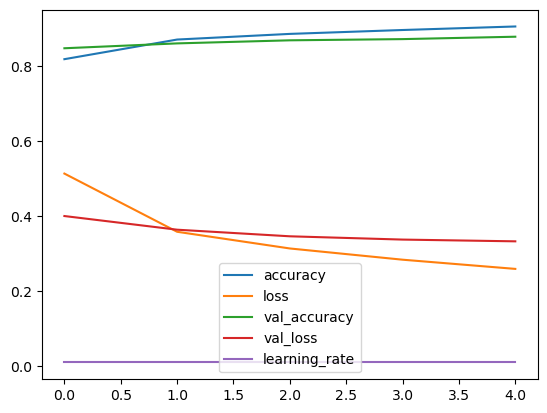

In [31]:
pd.DataFrame(history.history).plot()

In [35]:
pd.DataFrame(history.history)['Learning Rate'].plot()

KeyError: 'Learning Rate'